**Pigeon-Hole Principle:** Let $n$ and $k$ be positive integers and let $n > k$. Suppose, we have to place the $n$ identical balls into $k$ identical boxes. Then, there will be at least one box in which we place at least two balls.

**Problem:** There is an element in the sequence $7,77,777,\cdots$ that is divisible by $2003$. 

In theory class, we have seen that if we consider first $2003$ elements of this sequence, we are able to show that there exist an element within these $2003$ many elements, which is divisible by $2003$.

Here,computationally we prove this result and fidn that number which is divisible by $2003$. Along with this, we also want to investigate the time to find the element.

In [1]:
import time
import itertools as itr
import matplotlib.pyplot as plt

In [2]:
n = 2003
seq = [int('7'*i) for i in range(1,n+1)]
strt = time.time()
for i in range(0,len(seq)+1):
    if (seq[i]%n) ==0:
        print(f"The position in the sequence of the divisible number is",i,"\n","The number is", seq[i])
        break
end = time.time()
print(f"The time taken to find the number is",end - strt)
    

The position in the sequence of the divisible number is 1000 
 The number is 77777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777

**Stirling Number of 2nd kind:** Suppose we have $n$ many not identical (different) objects and $k$ many identical boxes with $n \ge k$. Since the objects are different, so we can lebel them. We want to partition the set $S[n] = \{1,2,\cdots,n\}$ into $k$ many no-empty subsets. The number of partitions is denoted by $S(n,k)$, called Stirling number of 2nd kind.

The objects are not identical, because if they are identical, then it might be possible that one object has putted in two different boxes, which is not possible. Although it doesn't matter that which object has came first in any one of the boxes, so the order of the elements doesn't matter but their identifications are matter here!!!!!!. So, it is necessary to take the balls or the objects are not identical.

**Some Properties of Strling number of 2nd kind :**

1. S(0,0,) = 1

2. S(n,k)=0, if $\text{ if n < k }$

3. S(n,1) = S(n,n) = 1

4. S(n,n-1) = $n \choose 2$

The recurrence relations we have found in our theoritical class is given by: 

* The first recurrence relation is $$S(nk) = S(n-1,k-1) +  kS(n-1,k), \forall n < k$$

* The second recurrence relation is $$S(n+1,k) = \sum_{i =0}^{n}{n \choose k}S(n-i,k-1)$$.

Also, we have found an easiest way using `Inclusion-Exclusion Principle` to count the Stirling number of 2nd kind without using any recurrence relation and the formula is given by: $$S(n,k) = \frac{1}{k!}\sum_{j = 0}^{k}(-1)^j{k \choose j}(k-j)^n$$.

In [3]:
def stirling_num_2nd_kind_1st_rf(n,k):
    if (n==0 & k==0):
        return 1
    if (n<k):
        return 0
    else:
        s = 0
        if (k ==1 or k==n):
            s = s +1
        else:
            s += stirling_num_2nd_kind_1st_rf(n-1,k-1) + k*stirling_num_2nd_kind_1st_rf(n-1,k)
    return s

In [4]:
nlist = [1,2,..,20]
L = []
strt = time.time()
time_list = []
for n in nlist:
    srt =time.time()
    temp = [stirling_num_2nd_kind_1st_rf(n,k) for k in [1,..,n+1]]
    ends = time.time()
    time_list.append(end -srt)
    L.append(temp)
end = time.time()

In [5]:
print(f"the time taen to compute the Stirling number of 2nd kind for all the listed numbers is:", end - strt)

the time taen to compute the Stirling number of 2nd kind for all the listed numbers is: 3.876887798309326


In [6]:
table(L)

1   0
  1   1
  1   3
  1   7
  1   15
  1   31
  1   63
  1   127
  1   255
  1   511
  1   1023
  1   2047
  1   4095
  1   8191
  1   16383
  1   32767
  1   65535
  1   131071
  1   262143
  1   524287

In [9]:
def stirling_num_2nd_kind_2nd_rf(n,k):
    if (n==0 & k ==0):
        return 1
    if (n<k):
        return 0
    else:
        if (k==1 or k==n):
            return 1
        else:
            s = 0
            for i in [1,..,n+1]:
                s += binomial(n-1,k-i)*stirling_num_2nd_kind_2nd_rf(n-i,k-1)
        return s


In [10]:
nlist = [1,2,..,20]
L1 =[]
strt = time.time()
time_list1 = []
for n in nlist:
    srt = time.time()
    temp = [stirling_num_2nd_kind_2nd_rf(n,k) for k in [1,..,n+1]]
    end = time.time()
    time_list1.append(end -srt)
    L1.append(temp)
end = time.time()

In [11]:
print(f"The time taken for all the values in the list by the second recurrence relation of Striling number of 2nd kind is",end - strt)

The time taken for all the values in the list by the second recurrence relation of Striling number of 2nd kind is 338.33112144470215


In [12]:
print(f"The time taken by to compute the Stirling number of 2nd kind for each n value are", time_list1)

The time taken by to compute the Stirling number of 2nd kind for each n value are [8.296966552734375e-05, 4.482269287109375e-05, 0.03207826614379883, 0.0011954307556152344, 0.00404047966003418, 0.014828920364379883, 0.0315699577331543, 0.041390419006347656, 0.048743486404418945, 0.10489439964294434, 0.2121284008026123, 0.4312317371368408, 0.8512051105499268, 1.7430267333984375, 3.994964599609375, 8.160648822784424, 15.901487588882446, 35.11249780654907, 151.0731475353241, 120.57140564918518]


In [13]:
def stirling_number(n,k):
    s = 0
    for j in [0,1,..,k]:
        s += (-1)^j*binomial(k,j)*(k-j)^n
    return s/factorial(k)

In [14]:
nl = [1,..,20]
L=[]
strt = time.time()
time_list2 = []
for n in nl:
    srt = time.time()
    temp = [stirling_number(n,k) for k in [1,..,n+1]]
    end = time.time()
    time_list2.append(end - srt)
    L.append(temp)
end = time.time()

In [15]:
print(f"The time taken for all the values in the list of stirling number of 2nd kind is", end - strt)

The time taken for all the values in the list of stirling number of 2nd kind is 0.17253708839416504


In [16]:
print(f"The time taken for each n value is given by",time_list2)

The time taken for each n value is given by [0.002370595932006836, 0.001428842544555664, 0.0012328624725341797, 0.0019073486328125, 0.0018775463104248047, 0.0024187564849853516, 0.002962827682495117, 0.0054781436920166016, 0.0045545101165771484, 0.0053217411041259766, 0.007577180862426758, 0.008988618850708008, 0.012285947799682617, 0.011407136917114258, 0.010712146759033203, 0.012696027755737305, 0.012700796127319336, 0.013091087341308594, 0.01423192024230957, 0.03876519203186035]


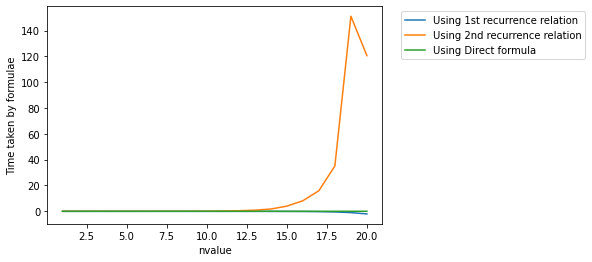

In [18]:
plt.plot(nlist,time_list,label = "Using 1st recurrence relation" )
plt.plot(nlist,time_list1,label ="Using 2nd recurrence relation")
plt.plot(nlist,time_list2,label ="Using Direct formula")
plt.xlabel("nvalue")
plt.ylabel("Time taken by formulae")
plt.legend(bbox_to_anchor = (1.04,1));